__Author: Стурейко Игорь__

__Project: Geekbrains.NeutralNets__

__Lesson 3 - Основы Keras__

__Date: 2021-12-09__

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import boston_housing

In [3]:
print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

есть ли доступные GPU: 
[]


In [4]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [5]:
x_train.shape

(404, 13)

In [6]:
# Define model
model_housing = Sequential()
model_housing.add(Normalization(axis=-1))
model_housing.add(Dense(500, input_dim=13, kernel_initializer='normal', activation='relu'))
model_housing.add(Dense(100, kernel_initializer='normal', activation='relu'))
model_housing.add(Dense(50, kernel_initializer='normal', activation='relu'))
model_housing.add(Dense(1, kernel_initializer='normal'))

# Compile model
model_housing.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])

hh1 = model_housing.fit(x_train, y_train, epochs=20, verbose=False)

test_loss, test_acc = model_housing.evaluate(x_test,  y_test, verbose=0)

test_acc

48.305625915527344

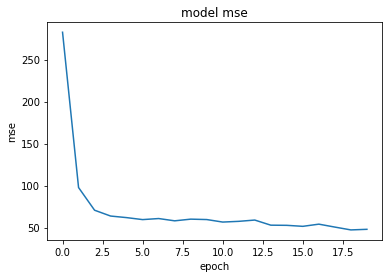

In [7]:
plt.plot(hh1.history['mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

In [8]:
# Define model
model_housing_2 = Sequential()
model_housing_2.add(Normalization(axis=-1))
model_housing_2.add(Dense(300, input_dim=13, kernel_initializer='normal', activation='relu'))
model_housing_2.add(Dense(50, kernel_initializer='normal', activation='relu'))
model_housing_2.add(Dense(1, kernel_initializer='normal'))

# Compile model
model_housing_2.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])

hh = model_housing_2.fit(x_train, y_train, epochs=200, verbose=False)

test_loss, test_acc = model_housing_2.evaluate(x_test,  y_test, verbose=0)

test_acc

26.761991500854492

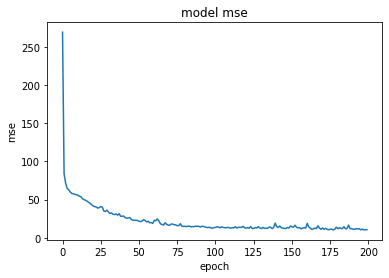

In [9]:
plt.plot(hh.history['mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

mse: 29.892332077026367


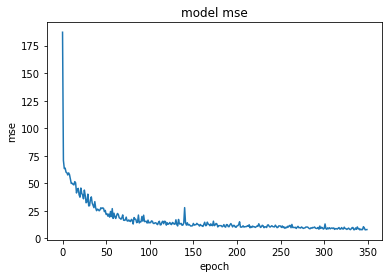

In [10]:
# Define model
model_housing_3 = Sequential()
model_housing_3.add(Normalization(axis=-1))
model_housing_3.add(Dense(300, input_dim=13, kernel_initializer='normal', activation='relu'))
model_housing_3.add(Dense(50, kernel_initializer='normal', activation='relu'))
model_housing_3.add(Dense(1, kernel_initializer='normal'))

# Compile model
model_housing_3.compile(loss='mean_squared_error', optimizer='Nadam', metrics=["mean_squared_error"])

hh_3 = model_housing_3.fit(x_train, y_train, epochs=350, verbose=False)

test_loss, test_acc = model_housing_3.evaluate(x_test,  y_test, verbose=0)

print(f"mse: {test_acc}")

plt.plot(hh_3.history['mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

In [11]:
class HousingModel:

  def __init__(self, n_neurons, n_layers, act_func, epochs):
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.act_func = act_func
    self.epochs = epochs
    
  def calc(self, x_train, y_train, x_test, y_test):
    # Define model
    model_housing = Sequential()
    model_housing.add(Normalization(axis=-1))
    model_housing.add(Dense(self.n_neurons, input_dim=13, kernel_initializer='normal', activation=self.act_func))
    for n in np.arange(self.n_layers):
      model_housing.add(Dense(int(self.n_neurons/2), kernel_initializer='normal', activation=self.act_func))
    model_housing.add(Dense(1, kernel_initializer='normal'))

    # Compile model
    model_housing.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_squared_error"])

    hh = model_housing.fit(x_train, y_train, epochs=self.epochs, verbose=False)

    test_loss, test_acc = model_housing.evaluate(x_test,  y_test, verbose=0)

    return [hh, test_acc]

26.261259078979492


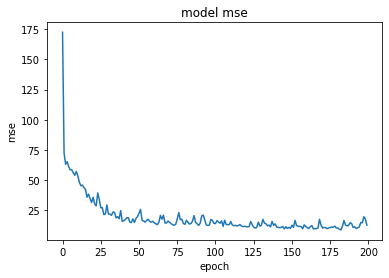

In [12]:
hm = HousingModel(300, 2, 'relu', 200).calc(x_train, y_train, x_test, y_test)
print(hm[1])
plt.plot(hm[0].history['mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

In [13]:
res = pd.DataFrame(columns=['num_neutrons', 'num_layers', 'epochs', 'test_mse'])
for n_neutrons in np.arange(100, 500, 50):
  for n_layers in np.arange(2, 10):
    for epochs in np.arange(100, 300, 10):
      hm = HousingModel(n_neutrons, n_layers, 'relu', epochs).calc(x_train, y_train, x_test, y_test)
      res.loc[len(res)] = [n_neutrons, n_layers, epochs, hm[1]]
res.to_csv('res.csv', encoding='utf-8')


In [14]:
res.shape

(1280, 4)

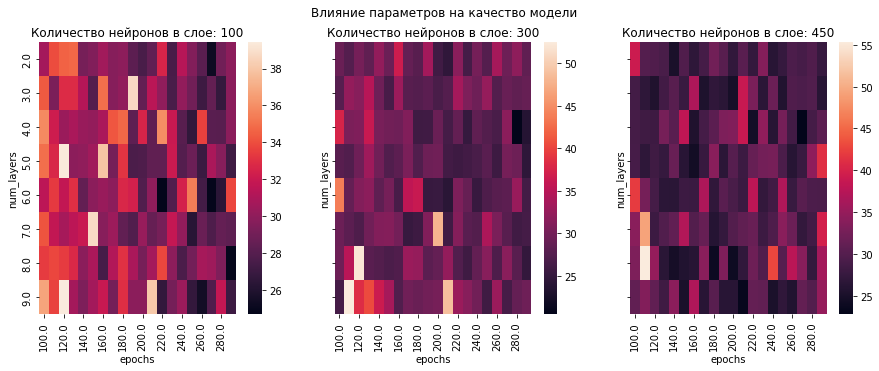

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Влияние параметров на качество модели')
to_heat = res.loc[res['num_neutrons']==100].pivot('num_layers', 'epochs', 'test_mse')
sns.heatmap(ax=axes[0], data=to_heat)
axes[0].set_title('Количество нейронов в слое: 100')
to_heat = res.loc[res['num_neutrons']==300].pivot('num_layers', 'epochs', 'test_mse')
sns.heatmap(ax=axes[1], data=to_heat)
axes[1].set_title('Количество нейронов в слое: 300')
to_heat = res.loc[res['num_neutrons']==450].pivot('num_layers', 'epochs', 'test_mse')
sns.heatmap(ax=axes[2], data=to_heat)
axes[2].set_title('Количество нейронов в слое: 450')
plt.show()

## Выводы:
1. Увеличение количества эпох ведет к повышению качества (что ожидаемо)
1. Увеличение числа нейронов с слое не приводит к существенному увеличению качества, а во много приводит к ухудшению (что неожиданно)
1. Увеличение числа стоев не оказывает существенного влияния на результат